## Deskripsi Proyek
Anda bekerja di toko daring "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Anda perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Anda bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.

Di depan Anda tersedia data dari tahun 2016. Mari bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan Anda sedang merencanakan kampanye untuk tahun 2017.
(Saat ini, yang terpenting bagi Anda adalah untuk mendapatkan pengalaman bekerja dengan data. Tidak masalah apakah Anda meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016 atau meramalkan penjualan tahun 2027 berdasarkan data dari tahun 2026.).


Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

### Load File

In [1]:
# Memuat library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# Memuat data games
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('games.csv')

In [3]:
# Memeriksa file games
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Mendapatkan informasi Games
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Mini Conclusion</b>

— Name = Nama permainan, <b>16713 Rows < 16715 Rows total, Perlu dilakukan pengecekan. </b>

— Platform = Game Console,

— Year_of_Release = Tahun Rilis, <b> 16446 row < 16715 row total, dan Type data Float. Perlu dilakukan pengecekan.</b>

— Genre = Genre permainan, <b> 16713 Rows < 16715 Rows total, Perlu dilakukan pengecekan. </b>

— NA_sales = penjualan di Amerika Utara (dalam satuan juta USD)

— EU_sales = penjualan di Eropa (dalam satuan juta USD)

— JP_sales = penjualan di Jepang (dalam satuan juta USD)

— Other_sales = penjualan di negara lainnya (dalam satuan juta USD)

— Critic_Score = skor ulasan dari kritikus (range 1 - 100), <b> 8137 row < 16715 row total, dan Type data Float. Perlu dilakukan pengecekan. </b>

— User_Score = skor ulasan dari pengguna (range 1 - 10), <b> 10014 row < 16715 row total dan type data object yang seharusnya float, Perlu dilakukan pengecekan. </b>

— Rating = Entertainment Software Rating Board ESRB (Berdasarkan Umur), <br> <b>9949 row < 16715 row total, Perlu dilakukan pengecekan. </b>
    <br>E = Everyone, Semua umur.
    <br>T = Teen, Hanya dikhususkan untuk remaja.
    <br>M = Mature, Hanya dikhususkan untuk usia 17 tahun ke atas.
    <br>E10+ = Everyone 10+, Hanya untuk usia 10 tahun ke atas.
    <br>EC = Early Childhood, Permainan yang dikhususkan untuk anak usia dini dan sarat nilai pendidikan.
    <br>RP = Rating Pending, Permainan atau bahan belum didaftarkan.
    <br>K-A = Kids to Adult, Permainan untuk kalangan anak-anak hingga dewasa.
    <br>AO = Adults Only, Permainan hanya untuk orang Dewasa.
    


### Data Exploring

#### Rename Column

In [5]:
# Mengubah nama column menjadi huruf kecil
games.columns = games.columns.str.lower()

In [6]:
# Memeriksa file games
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
# Menampilkan informasi kolom yang tersedia
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Missing Value

##### name

In [8]:
# Mendapatkan informasi nama yang hilang
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# Mencari clue berdasarkan year_of_release
games.loc[(games['year_of_release'] == 1993.0) & (games['platform'] == 'GEN')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b>Noted.</b> <a class="tocSkip"></a>
    
Karena tidak terdapat petunjuk atau clue pada nilai nama yang hilang, maka 2 data tersebut akan di exclude 
</div>

In [10]:
# Melakukan exclude nilai nama yang hilang.
nan_name = games.loc[games['name'].isna()].index
games.drop(nan_name, inplace=True)

In [11]:
# Mendapatkan informasi jumlah kolom dan baris
games.shape

(16713, 11)

##### year_of_release

In [12]:
# Mendapatkan informasi nilai yang hilang
games['year_of_release'].isna().sum()

269

In [13]:
# Mendapatkan nilai unik pada kolom year_of_release
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
# Mendapatkan informasi nilai yang hilang pada kolom year_of_release
games.loc[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>
    
Terdapat 269 kolom nilai year_of_release yang hilang <br>
Terdapat informasi tahun terbit di beberapa nama games
</div>

In [15]:
# Mendapatkan informasi informasi tahun terbit di pada kolom nama
get_years = games.loc[(games['year_of_release'].isna()) & (games['name'].str.contains('\d{4}', regex=True))]
get_years = get_years['name'].str.findall('\d{4}')

In [16]:
# melihat informasi tahun pada kolom
get_years = get_years.str.get(0)

In [17]:
get_years = pd.to_numeric(get_years)

In [18]:
get_years

183      2004
377      2004
475      2006
1650     2003
2572     2009
3486     2002
4775     2003
5156     2003
5336     2013
5655     2005
5889     2003
8918     2005
13195    2011
13929    2006
15953    2008
16079    2007
16373    2008
Name: name, dtype: int64

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>
    
Terdapat 17 Kolom yang terdapat nilai tahun
</div>

In [19]:
# Mengubah nilai yang hilang pada year_of_release berdasarkan informasi tahun pada nama
games.loc[(games['year_of_release'].isna()) & (games['name'].str.contains('\d{4}', regex=True)), 'year_of_release'] = get_years

In [20]:
# Mendapatkan informasi nilai yang hilang pada kolom year_of_release kembali
games.loc[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
# Mendapatkan informasi nilai yang hilang
games['year_of_release'].isna().sum()

252

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>
    
Masih terdapat nilai yang hilang sebanyak 252 Kolom <br>
Nilai yang hilang tersebut akan diabaikan, karena tidak memiliki informasi yang cukup untuk mengisinya</div>

In [22]:
# Mengisi nilai yang hilang menjadi 0 yang artinya NaN dan Mengubah type data menjadi Interger
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

In [23]:
# Memeriksa kembali nilai year_of_release
games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16713, dtype: int64

##### genre

In [24]:
# Mendapatkan informasi nilai yang hilang
games['genre'].isna().sum()

0

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>
    
Nilai yang hilang pada kolom genre sudah ter replace dengan kolom name yang hilang.
</div>

##### critic_score

In [25]:
# Mendapatkan informasi jumlah nilai yang hilang
games['critic_score'].isna().sum()

8576

In [26]:
# Mendapatkan nilai unik pada kolom critic_score
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [27]:
# Mendapatkan informasi nilai yang hilang pada kolom year_of_release
games.loc[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>
    
Tidak terdapat clue untuk mengisi skor ulasan dari kritikus (critic_score), sehingga nilai tersebut akan diabaikan.
</div>

In [28]:
# Mengisi nilai yang hilang dengan 0 dan mengubah type menjadi interger
games['critic_score'] = games['critic_score'].fillna(0).astype(int)

In [29]:
# Memeriksa kembali nilai critic_score
games['critic_score']

0        76
1         0
2        82
3        80
4         0
         ..
16710     0
16711     0
16712     0
16713     0
16714     0
Name: critic_score, Length: 16713, dtype: int64

##### user_score

In [30]:
# Mendapatkan informasi jumlah nilai yang hilang
games['user_score'].isna().sum()

6699

In [31]:
# Mendapatkan nilai unik pada kolom user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [32]:
# Mendapatkan informasi nilai yang hilang pada kolom year_of_release
games.loc[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,NaN,NaN


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>
    
Tidak terdapat clue untuk mengisi skor ulasan dari kritikus (critic_score), sehingga nilai tersebut akan diabaikan.
</div>

In [33]:
# Memeriksa total nilai "tbd"
games['user_score'].loc[games['user_score'] == 'tbd'].count()

2424

In [34]:
# Mengubah value tbd menjadi nilai yang hilang dengan alasan tbd belum diputuskan scorenya.
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.NaN

In [35]:
# Mengisi nilai yang hilang dengan 0
games['user_score'] = games['user_score'].fillna(0)

In [36]:
# Mengubah type data object menjadi float
games['user_score'] = games['user_score'].astype(float)

In [37]:
# Memeriksa kembali
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


##### rating

In [38]:
# Mendapatkan informasi jumlah nilai yang hilang
games['rating'].isna().sum()

6764

In [39]:
# Mendapatkan nilai unik pada kolom user_score
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>
    
Tidak terdapat clue untuk rating dari game, sehingga nilai tersebut akan diabaikan.
</div>

In [40]:
# Mengisi nilai yang hilang dengan 0
games['rating'] = games['rating'].fillna('NaN')

In [41]:
# Memeriksa kembali
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>
    
Nilai yang hilang sudah teratasi</div>

#### Total Sales

In [42]:
# Menambahkan kolom total sales yang merupakan jumlah pendapatan dari na, eu, jp dan other sales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [43]:
# Memeriksa kolom total sales
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,31.38


### Analysist Data Exploratif (EDA)

#### berapa banyak game yang dirilis pada tahun yang berbeda?

In [44]:
# Memuat jumlah game yang dirilis setiap tahunnya
year_of_release_count = games.pivot_table(index='year_of_release', values='name', aggfunc='count')

In [45]:
year_of_release_count = year_of_release_count.reset_index()

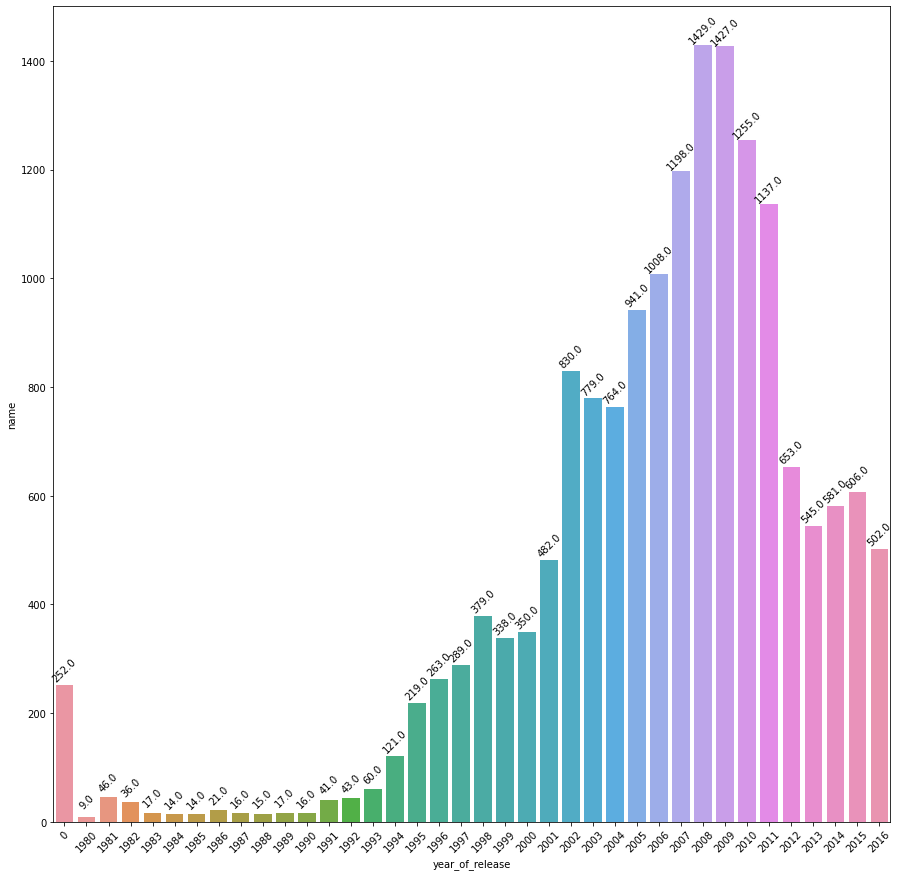

In [46]:
# Membuat bar diagram jumlah game yang dirilis setiap tahunnya
plt.figure(figsize=(15,15))
barplot = sns.barplot(data=year_of_release_count, x='year_of_release', y='name')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,15), rotation = 45,
                     textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Insight : 
- Pada tahun 1985 - 2009 publikasi games tergolong meningkat
- pada tahun 2008 dan 2009 merupakan tahun dimana games paling banyak diterbitkan.
- pada tahun 2009 hingga 2016 publikasi games tergolong menurun.

</div>

#### bagaimana penjualan dari masing-masing platform?

In [47]:
# Memuat total penjualan masing-masing platform
total_sales_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales')

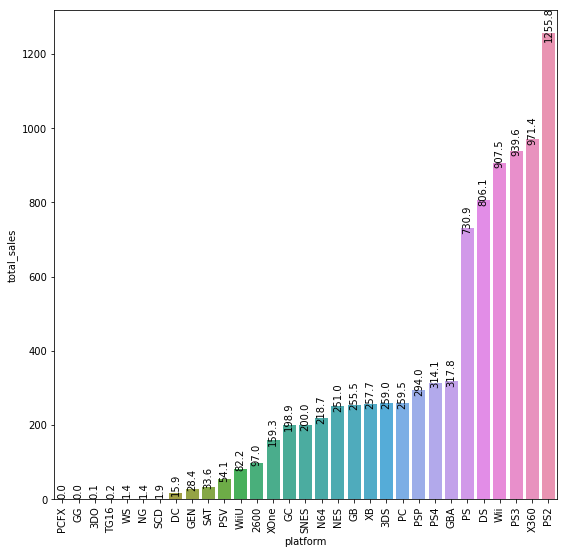

In [48]:
# Membuat bar diagram penjualan masing-masing platform
plt.figure(figsize=(9,9))
barplot = sns.barplot(data=total_sales_platform, x='platform', y='total_sales')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), rotation = 90,
                     textcoords = 'offset points')

plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Insight : 
- 5 Platform teratas dengan penjualan tertinggi yaitu : <br>
    (1) PS2 ; <br>
    (2) X360 ; <br>
    (3) PS3 ; <br>
    (4) Wii ; <br>
    (5) DS.
</div>

In [49]:
# Memuat total penjualan masing-masing platform berdasarkan tahun
yearly_sales_platform = games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()

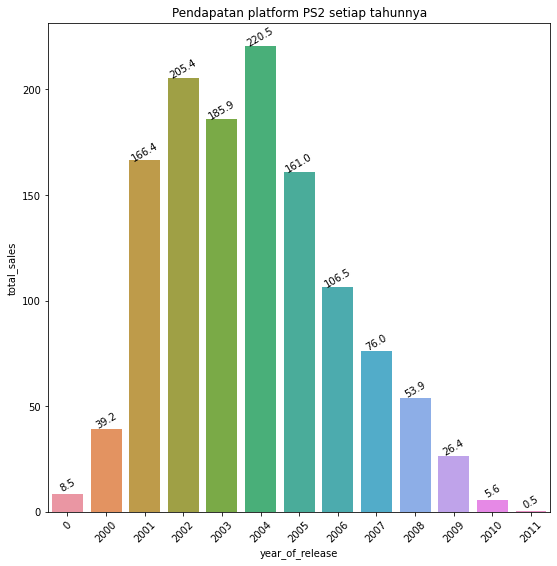

In [50]:
# Membuat diagram penjualan setiap tahunnya pada platform PS2 
plt.figure(figsize=(9,9))
barplot = sns.barplot(data=yearly_sales_platform.query("platform == 'PS2'"), x='year_of_release', y='total_sales')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), rotation = 30,
                     textcoords = 'offset points')

plt.title('Pendapatan platform PS2 setiap tahunnya')
plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Insight : 
- 3 Tahun pertama sejak beberapa platform ps2 dirilis terdapat peningkatan yang signifikan
- pada tahun ke 4 PS2 memiliki penjualan tertinggi yaitu 220juta$
- Namun pada 8 tahun selanjutnya platform PS2 mengalami penurunan yang sangat signifikan hingga tahun 2011
</div>

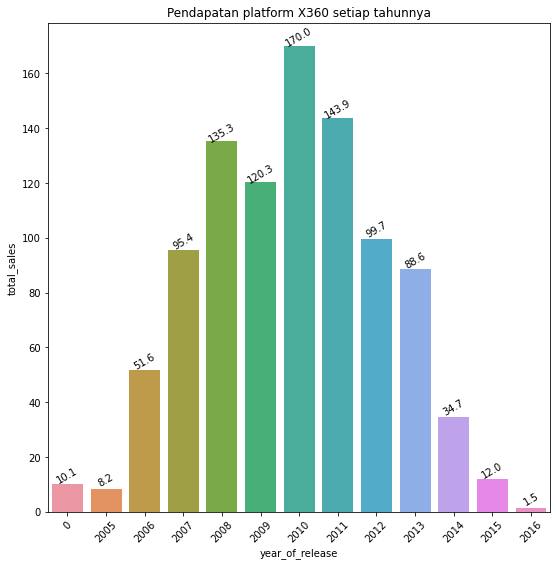

In [51]:
# Membuat diagram penjualan setiap tahunnya pada platform X360 
plt.figure(figsize=(9,9))
barplot = sns.barplot(data=yearly_sales_platform.query("platform == 'X360'"), x='year_of_release', y='total_sales')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), rotation = 30,
                     textcoords = 'offset points')

plt.title('Pendapatan platform X360 setiap tahunnya')
plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Insight : 
- 4 Tahun pertama sejak beberapa platform X360 dirilis terdapat peningkatan yang signifikan
- pada tahun ke 6 X360 memiliki penjualan tertinggi yaitu 170juta$
- Namun pada 6 tahun selanjutnya platform X360 mengalami penurunan yang sangat signifikan hingga tahun 2016
</div>

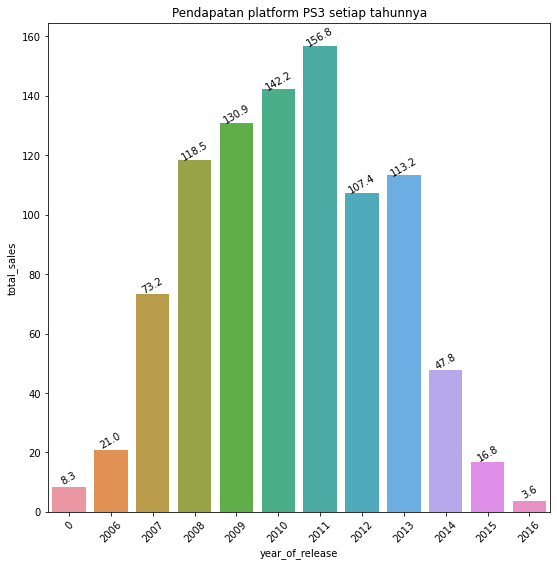

In [52]:
# Membuat diagram penjualan setiap tahunnya pada platform PS3 
plt.figure(figsize=(9,9))
barplot = sns.barplot(data=yearly_sales_platform.query("platform == 'PS3'"), x='year_of_release', y='total_sales')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), rotation = 30,
                     textcoords = 'offset points')

plt.title('Pendapatan platform PS3 setiap tahunnya')
plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Insight : 
- 6 Tahun pertama sejak beberapa platform PS3 dirilis terdapat peningkatan yang signifikan
- pada tahun ke 6 Wii memiliki penjualan tertinggi kurang lebih 156juta$
- Namun pada 5 tahun selanjutnya platform PS3 mengalami penurunan yang sangat signifikan hingga tahun 2016
</div>

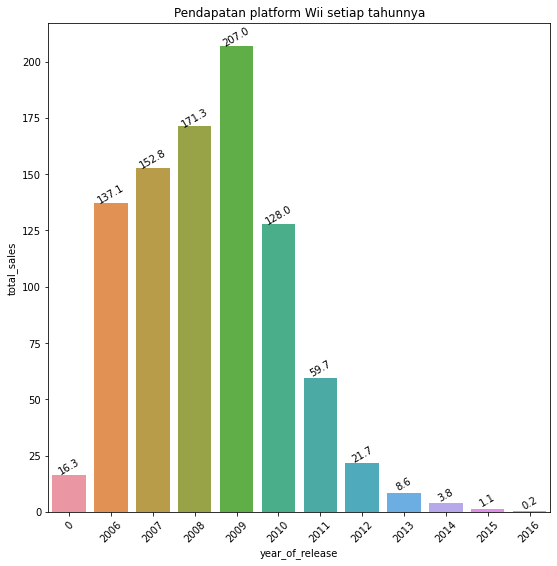

In [53]:
# Membuat diagram penjualan setiap tahunnya pada platform Wii 
plt.figure(figsize=(9,9))
barplot = sns.barplot(data=yearly_sales_platform.query("platform == 'Wii'"), x='year_of_release', y='total_sales')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), rotation = 30,
                     textcoords = 'offset points')

plt.title('Pendapatan platform Wii setiap tahunnya')
plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Insight : 
- 4 Tahun pertama sejak beberapa platform Wii dirilis terdapat peningkatan yang signifikan
- pada tahun ke 4 Wii memiliki penjualan tertinggi lebih 200 juta$
- Namun pada 7 tahun selanjutnya platform Wii mengalami penurunan yang sangat signifikan hingga tahun 2016
</div>

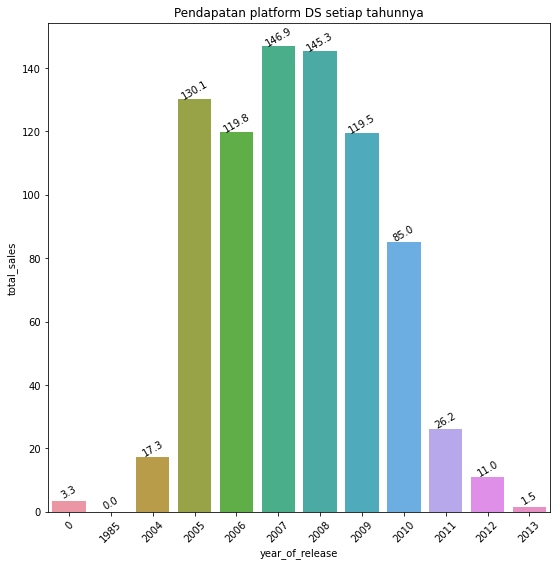

In [54]:
# Membuat diagram penjualan setiap tahunnya pada platform DS 
plt.figure(figsize=(9,9))
barplot = sns.barplot(data=yearly_sales_platform.query("platform == 'DS'"), x='year_of_release', y='total_sales')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), rotation = 30,
                     textcoords = 'offset points')

plt.title('Pendapatan platform DS setiap tahunnya')
plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Insight : 
- 4 Tahun pertama sejak beberapa platform DS dirilis terdapat peningkatan yang signifikan
- pada tahun ke 4 DS memiliki penjualan tertinggi 140 juta$
- Namun pada 6 tahun selanjutnya platform DS mengalami penurunan yang sangat signifikan hingga tahun 2013
</div>

<div class="alert alert-block alert-info">
<b>Mini Conclution</b> <a class="tocSkip"></a>

Pada 5 contoh platform dengan penghasilan tertinggi diatas menunjukan bahwa:
    
- Trend konsol game berlangsung selama 3 - 6 tahun untuk mendapatkan tingkat penjualan tertinggi
- Trend konsol game mulai memudar dengan estimasi 5 - 8 Tahun.

#### Menentukan periode waktu pengambilan data.

Untuk membanguan acuan pada tahun 2017 maka Berdasarkan kesimpulan sebelumnya, data yang akan digunakan yaitu 3 - 6 Tahun sebelumnya untuk mendapatkan nilai jual yang meningkat ataupun menurun.

In [55]:
# Mengiris variable games yang rilis
predict_games = games.query("year_of_release >= 2010")

In [56]:
# Mendapatkan informasi
predict_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5279 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5279 non-null   object 
 1   platform         5279 non-null   object 
 2   year_of_release  5279 non-null   int64  
 3   genre            5279 non-null   object 
 4   na_sales         5279 non-null   float64
 5   eu_sales         5279 non-null   float64
 6   jp_sales         5279 non-null   float64
 7   other_sales      5279 non-null   float64
 8   critic_score     5279 non-null   int64  
 9   user_score       5279 non-null   float64
 10  rating           5279 non-null   object 
 11  total_sales      5279 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 536.1+ KB


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Terdapat 5,279 data

#### Platform mana saja yang memiliki penjualan terbanyak pada 6 tahun terakhir?

In [57]:
# Memuat total penjualan masing-masing platform berdasarkan tahun pada 6 tahun terakhir
games_sales = predict_games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

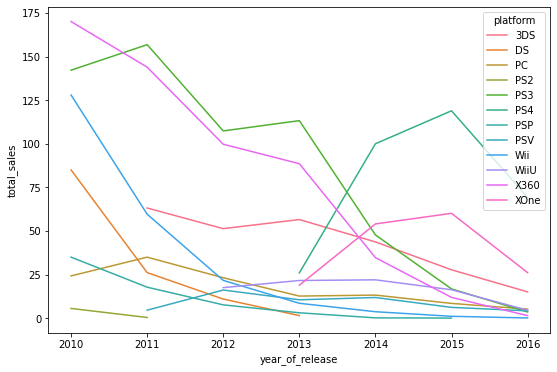

In [58]:
# Memlihat informasi grafik total penjualan masing-masing platform berdasarkan tahun pada 6 tahun terakhir
plt.figure(figsize=(9,6))
sns.lineplot(data=games_sales, x='year_of_release', y='total_sales', hue='platform')

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Insight : 
- Platform XOne dan PS4 memiliki penjualan yang tergolong meningkat dari 2013 - 2015 namun pada tahun 2016 mengalami penurunan.
    
- Platform lainnya kecuali XOne dan PS4, penjualannya tergolong menurun dari tahun-ketahun.
    
- Platform PS4 dan Xone memiliki potensi menghasilkan keuntungan pada tahun 2017, Sedangkan platform lainnya menyusut.
</div>

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

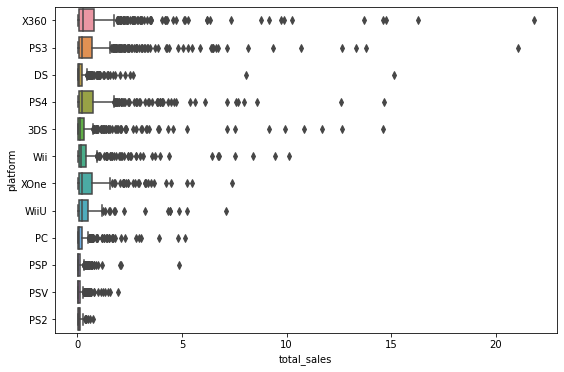

In [59]:
# Melihat informasi grafik rata-rata penjualan masing-masing platform pada 6 tahun terakhir
plt.figure(figsize=(9,6))
sns.boxplot(data=predict_games, x='total_sales', y='platform')

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Terdapat nilai outlier yang cukup jauh sehingga perlu dilakukan pemotongan outlier terlebih dahulu
</div>

In [60]:
# Memotong outlier
q1 = predict_games['total_sales'].quantile(0.25)
q3 = predict_games['total_sales'].quantile(0.75)
iqr = q3 - q1

In [61]:
# Tentukan batas bawah outlier
outlier_lower_bound = q1 - (1.5*iqr)
print('Batas bawah:', outlier_lower_bound)

Batas bawah: -0.5


In [62]:
# Tentukan batas atas outlier
outlier_upper_bound = q3 + (1.5*iqr)
print('Batas atas:', outlier_upper_bound)

Batas atas: 0.9400000000000001


In [63]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
data_without_outlier_sales = predict_games.query("total_sales > @outlier_lower_bound and total_sales < @outlier_upper_bound")

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

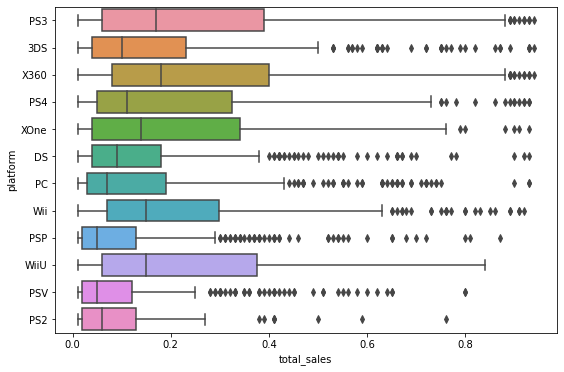

In [64]:
# Melihat informasi grafik rata-rata penjualan masing-masing platform pada 6 tahun terakhir
plt.figure(figsize=(9,6))
sns.boxplot(data=data_without_outlier_sales, x='total_sales', y='platform')

In [65]:
# Melihat informasi rata-rata penjualan masing-masing platform pada 6 tahun terakhir
data_without_outlier_sales.pivot_table(index='platform', values='total_sales', aggfunc=[np.mean , np.var, np.std])

,mean,var,std
,total_sales,total_sales,total_sales
platform,,,
3DS,0.181952,0.040243,0.200607
DS,0.143864,0.024629,0.156937
PC,0.148293,0.035016,0.187127
PS2,0.135333,0.032630,0.180638
PS3,0.255014,0.058629,0.242134
PS4,0.217492,0.056049,0.236746
PSP,0.106808,0.019025,0.137931
PSV,0.104621,0.017818,0.133483


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
Platform dengan rata-rata penjualan tertinggi pada 6 tahun terakhir yaitu
1. X360
2. PS3
3. Wii

Platform dengan rata-rata penjualan terkecil pada 6 tahun terakhir yaitu
1. PSV
2. PSP
3. PS2
</div>

#### Bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer?

In [66]:
# Memuat kolom yang diperlukan untuk mendapatkan informasi korelasi score
score_column = ['name', 'platform', 'critic_score', 'user_score', 'total_sales']

In [67]:
# Mengiris data games berdasarkan platform dengan rata-rata penjualan tertinggi pada 6 tahun terakhir
x360_score = games.loc[games['platform'] == 'X360', score_column]
ps3_score = games.loc[games['platform'] == 'PS3', score_column]
wii_score = games.loc[games['platform'] == 'Wii', score_column]

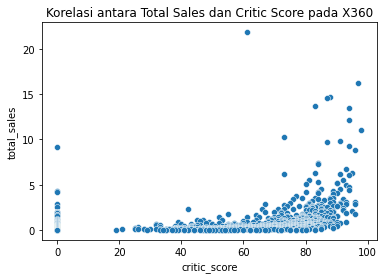

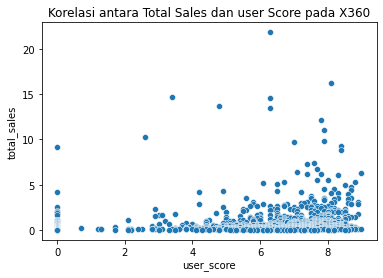

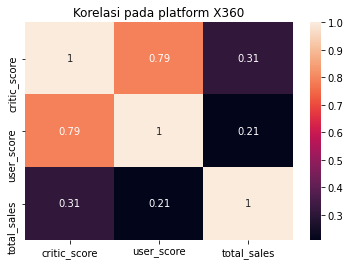

In [68]:
# Melihat informasi korelasi platform X360
plt.title('Korelasi antara Total Sales dan Critic Score pada X360')
sns.scatterplot(data=x360_score, x='critic_score' , y='total_sales')
plt.show()

plt.title('Korelasi antara Total Sales dan user Score pada X360')
sns.scatterplot(data=x360_score, x='user_score' , y='total_sales')
plt.show()

plt.title('Korelasi pada platform X360')
sns.heatmap(x360_score.corr(), annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Korelasi skor user dan skor kritikus terhadap total penjualan yaitu positif  namun tergolong lemah.
- Korelasi antara skor user dan skor kritikus yaitu positif dan tergolong kuat.

</div>

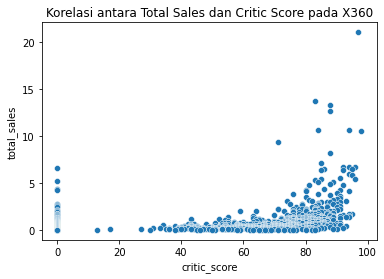

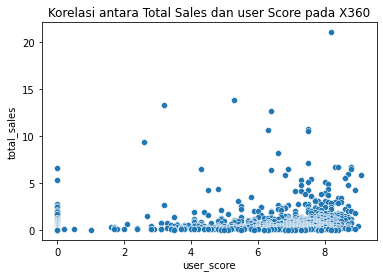

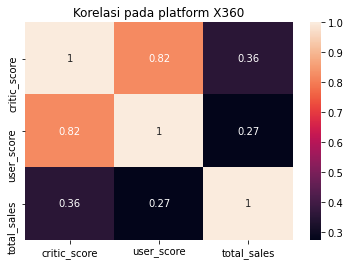

In [69]:
# Melihat informasi korelasi platform PS3
plt.title('Korelasi antara Total Sales dan Critic Score pada X360')
sns.scatterplot(data=ps3_score, x='critic_score' , y='total_sales')
plt.show()

plt.title('Korelasi antara Total Sales dan user Score pada X360')
sns.scatterplot(data=ps3_score, x='user_score' , y='total_sales')
plt.show()

plt.title('Korelasi pada platform X360')
sns.heatmap(ps3_score.corr(), annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Korelasi skor user terhadap total penjualan yaitu positif lemah.
- Kolerasi skor kritikus terhadap total penjualan yaitu positif sedang.
- Korelasi antara skor user dan skor kritikus yaitu positif dan tergolong kuat.

</div>

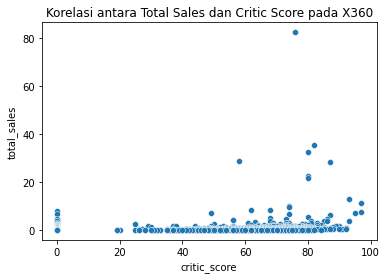

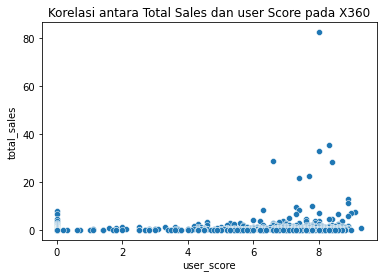

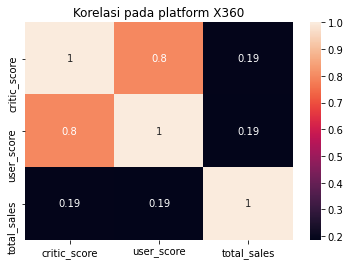

In [70]:
# Melihat informasi korelasi platform Wii
plt.title('Korelasi antara Total Sales dan Critic Score pada X360')
sns.scatterplot(data=wii_score, x='critic_score' , y='total_sales')
plt.show()

plt.title('Korelasi antara Total Sales dan user Score pada X360')
sns.scatterplot(data=wii_score, x='user_score' , y='total_sales')
plt.show()

plt.title('Korelasi pada platform X360')
sns.heatmap(wii_score.corr(), annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Korelasi skor user dan skor kritikus terhadap total penjualan yaitu positif  namun tergolong lemah.
- Korelasi antara skor user dan skor kritikus yaitu positif dan tergolong kuat.

</div>

<div class="alert alert-block alert-info">
<b>Mini Conclution</b> <a class="tocSkip"></a>

 
- skor user dan skor kritikus terhadap total penjualan rata-rata memiliki korelasi positif lemah.
- rata-rata Korelasi antara skor user dan skor kritikus yaitu positif dan tergolong kuat.

</div>

#### Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan pada 6 tahun terakhir??

In [71]:
# Membuat pivot table terkait rata-rata dan jumlah penjualan berdasarkan genre
genre_sales = predict_games.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', np.mean]).reset_index()

In [72]:
# Penyesuaian nama kolom
genre_sales.columns = ['genre', 'total_games', 'total_sales', 'mean_total_sales']

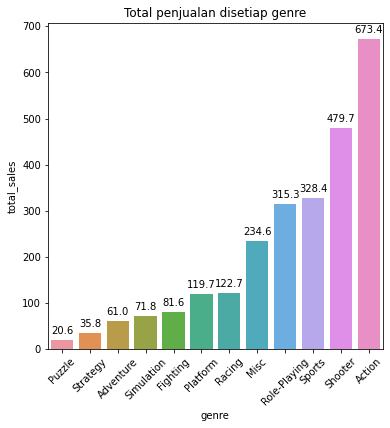

In [73]:
# Membuat diagram Rata-rata penjualan disetiap genre
plt.figure(figsize=(6,6))
barplot = sns.barplot(data=genre_sales.sort_values(by='total_sales'), x='genre', y='total_sales')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), rotation = 0,
                     textcoords = 'offset points')

plt.title('Total penjualan disetiap genre')
plt.xticks(rotation = 45)
plt.show()

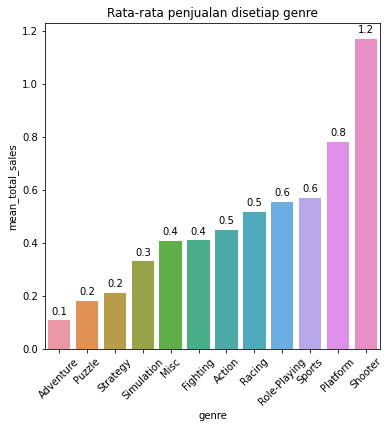

In [74]:
# Membuat diagram Rata-rata penjualan disetiap genre
plt.figure(figsize=(6,6))
barplot = sns.barplot(data=genre_sales.sort_values(by='mean_total_sales'), x='genre', y='mean_total_sales')

for i in barplot.patches:
    barplot.annotate(format(i.get_height(), '.1f'),
                     (i.get_x() + i.get_width() / 2., i.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), rotation = 0,
                     textcoords = 'offset points')

plt.title('Rata-rata penjualan disetiap genre')
plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan genre games tertinggi pada 6 tahun terakhir yaitu :
1. Shooter
2. Platform
3. Sport
    
- Rata-rata penjualan genre games terendah pada 6 tahun terakhir yaitu :
1. Adventure
2. Puzzle
3. Strategy

</div>

### pemrofilan pengguna untuk masing-masing wilayah

#### NA (Amerika Utara)

##### Platform penjualan tertinggi

In [75]:
# Mendapatkan 5 platform penjualan teratas pada penjualan di Amerika Utara
platform_na_sales = predict_games.pivot_table(index='platform', values='na_sales', aggfunc=['sum', 'count', np.mean])

In [76]:
platform_na_sales = platform_na_sales.reset_index(drop=False)

In [77]:
platform_na_sales.columns = ['platform', 'total_sales', 'total_games', 'sales_mean']

In [78]:
platform_na_sales.sort_values(by='sales_mean')

,platform,total_sales,total_games,sales_mean
6,PSP,9.65,500,0.019300
7,PSV,12.47,429,0.029068
3,PS2,2.32,45,0.051556
2,PC,39.13,480,0.081521
1,DS,59.66,507,0.117673
0,3DS,82.65,512,0.161426
4,PS3,229.25,889,0.257874
9,WiiU,38.10,147,0.259184
8,Wii,121.20,450,0.269333
5,PS4,108.74,392,0.277398


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan platform di wilayah Amerika Utara pada 6 tahun terakhir yaitu :
1. X360
2. XOne
3. PS4
4. Wii
5. WiiU

</div>

##### Genre penjualan tertinggi

In [79]:
# Mendapatkan 5 genre penjualan teratas pada penjualan di Amerika Utara
genre_na_sales = predict_games.pivot_table(index='genre', values='na_sales', aggfunc=['sum', 'count', np.mean])

In [80]:
genre_na_sales = genre_na_sales.reset_index(drop=False)

In [81]:
genre_na_sales.columns = ['genre', 'total_sales', 'total_games', 'sales_mean']

In [82]:
genre_na_sales.sort_values(by='sales_mean')

,genre,total_sales,total_games,sales_mean
1,Adventure,20.84,563,0.037016
11,Strategy,13.25,170,0.077941
5,Puzzle,9.10,114,0.079825
9,Simulation,26.39,217,0.121613
6,Racing,46.11,238,0.193739
0,Action,290.70,1496,0.194318
2,Fighting,39.05,199,0.196231
7,Role-Playing,112.05,568,0.197271
3,Misc,123.80,576,0.214931
10,Sports,156.81,575,0.272713


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan genre di wilayah Amerika Utara pada 6 tahun terakhir yaitu :
1. Shooter
2. Platform
3. Sports
4. Misc
5. Role-Playing

</div>

##### Rating penjualan tertinggi

In [83]:
# Mendapatkan 5 rating penjualan teratas pada penjualan di Amerika Utara
rating_na_sales = predict_games.pivot_table(index='rating', values='na_sales', aggfunc=['sum', 'count', np.mean])

In [84]:
rating_na_sales = rating_na_sales.reset_index(drop=False)

In [85]:
rating_na_sales.columns = ['rating', 'total_sales', 'total_games', 'sales_mean']

In [86]:
rating_na_sales.query("~(rating == 'NaN')").sort_values(by='sales_mean')

,rating,total_sales,total_games,sales_mean
5,RP,0.00,1,0.000000
6,T,160.81,847,0.189858
2,EC,1.13,5,0.226000
1,E10+,159.38,603,0.264312
0,E,271.15,938,0.289072
3,M,382.28,720,0.530944


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan rating di wilayah Amerika Utara pada 6 tahun terakhir yaitu :
1. M
2. E
3. E10+
4. EC
5. T

</div>

#### EU (Eropa)

##### Platform penjualan tertinggi

In [87]:
# Mendapatkan 5 Platform penjualan teratas pada penjualan di Eropa
platform_eu_sales = predict_games.pivot_table(index='platform', values='eu_sales', aggfunc=['sum', 'count', np.mean])

In [88]:
platform_eu_sales = platform_eu_sales.reset_index()

In [89]:
platform_eu_sales.columns = ['platform', 'total_sales', 'total_games', 'sales_mean']

In [90]:
platform_eu_sales.sort_values(by='sales_mean')

,platform,total_sales,total_games,sales_mean
6,PSP,7.59,500,0.015180
7,PSV,13.07,429,0.030466
3,PS2,1.67,45,0.037111
1,DS,28.06,507,0.055345
0,3DS,61.27,512,0.119668
2,PC,69.07,480,0.143896
8,Wii,65.91,450,0.146467
9,WiiU,25.13,147,0.170952
11,XOne,51.59,247,0.208866
10,X360,163.45,681,0.240015


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan platform di wilayah Eropa pada 6 tahun terakhir yaitu :
1. PS4
2. PS3
3. X360
4. XOne
5. WiiU

</div>

##### Genre penjualan tertinggi

In [91]:
# Mendapatkan 5 Genre penjualan teratas pada penjualan di Eropa
genre_eu_sales = predict_games.pivot_table(index='genre', values='eu_sales', aggfunc=['sum', 'count', np.mean])

In [92]:
genre_eu_sales = genre_eu_sales.reset_index()

In [93]:
genre_eu_sales.columns = ['genre', 'total_sales', 'total_games', 'sales_mean']

In [94]:
genre_eu_sales.sort_values(by='sales_mean')

,genre,total_sales,total_games,sales_mean
1,Adventure,18.88,563,0.033535
5,Puzzle,6.58,114,0.057719
11,Strategy,12.49,170,0.073471
2,Fighting,20.33,199,0.102161
3,Misc,66.09,576,0.114740
9,Simulation,26.39,217,0.121613
7,Role-Playing,75.48,568,0.132887
0,Action,233.88,1496,0.156337
10,Sports,116.84,575,0.203200
6,Racing,54.79,238,0.230210


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan genre di wilayah Eropa pada 6 tahun terakhir yaitu :
1. Shooter
2. Platform
3. Racing
4. Sports
5. Action

</div>

##### Rating penjualan tertinggi

In [244]:
# Mendapatkan 5 Rating penjualan teratas pada penjualan di Eropa
rating_eu_sales = predict_games.pivot_table(index='rating', values='eu_sales', aggfunc=['sum', 'count', np.mean])

In [245]:
rating_eu_sales = rating_eu_sales.reset_index()

In [248]:
rating_eu_sales.columns = ['rating', 'total_sales', 'total_games', 'sales_mean']

In [249]:
rating_eu_sales.query("~(rating == 'NaN')").sort_values(by='sales_mean')

,rating,total_sales,total_games,sales_mean
2,EC,0.00,5,0.000000
5,RP,0.03,1,0.030000
6,T,113.08,847,0.133506
1,E10+,99.28,603,0.164643
0,E,197.34,938,0.210384
3,M,292.29,720,0.405958


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan rating di wilayah Eropa pada 6 tahun terakhir yaitu :
1. M
2. E
3. E10+
4. T
5. EC

</div>

#### JP (Jepang)

##### Platform penjualan tertinggi

In [254]:
# Mendapatkan 5 Platform penjualan teratas pada penjualan di Jepang
platform_jp_sales = predict_games.pivot_table(index='platform', values='jp_sales', aggfunc=['sum', 'count', np.mean])

In [255]:
platform_jp_sales = platform_jp_sales.reset_index()

In [256]:
platform_jp_sales.columns = ['platform', 'total_sales', 'total_games', 'sales_mean']

In [257]:
platform_jp_sales.sort_values(by='sales_mean')

,platform,total_sales,total_games,sales_mean
2,PC,0.00,480,0.000000
11,XOne,0.34,247,0.001377
10,X360,5.46,681,0.008018
3,PS2,0.80,45,0.017778
8,Wii,17.75,450,0.039444
5,PS4,15.96,392,0.040714
7,PSV,21.84,429,0.050909
1,DS,27.90,507,0.055030
4,PS3,59.26,889,0.066659
6,PSP,42.20,500,0.084400


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan platform di wilayah Jepang pada 6 tahun terakhir yaitu :
1. 3DS
2. WiiU
3. PSP
4. PS3
5. DS

</div>

##### Genre penjualan tertinggi

In [258]:
# Mendapatkan 5 Genre penjualan teratas pada penjualan di Jepang
genre_jp_sales = predict_games.pivot_table(index='genre', values='jp_sales', aggfunc=['sum', 'count', np.mean])

In [259]:
genre_jp_sales = genre_jp_sales.reset_index()

In [260]:
genre_jp_sales.columns = ['genre', 'total_sales', 'total_games', 'sales_mean']

In [261]:
genre_jp_sales.sort_values(by='sales_mean')

,genre,total_sales,total_games,sales_mean
10,Sports,15.51,575,0.026974
1,Adventure,15.67,563,0.027833
6,Racing,6.68,238,0.028067
5,Puzzle,3.40,114,0.029825
8,Shooter,14.04,410,0.034244
11,Strategy,6.80,170,0.040000
3,Misc,24.29,576,0.042170
0,Action,72.20,1496,0.048262
9,Simulation,13.30,217,0.061290
2,Fighting,13.90,199,0.069849


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan Genre di wilayah Jepang pada 6 tahun terakhir yaitu :
1. Role-Playing
2. Platform
3. Fighting
4. Simulation
5. Action

</div>

##### Rating penjualan tertinggi

In [262]:
# Mendapatkan 5 Rating penjualan teratas pada penjualan di Eropa
rating_jp_sales = predict_games.pivot_table(index='rating', values='jp_sales', aggfunc=['sum', 'count', np.mean])

In [263]:
rating_jp_sales = rating_jp_sales.reset_index()

In [264]:
rating_jp_sales.columns = ['rating', 'total_sales', 'total_games', 'sales_mean']

In [266]:
rating_jp_sales.query("~(rating == 'NaN')").sort_values(by='sales_mean')

,rating,total_sales,total_games,sales_mean
2,EC,0.00,5,0.000000
5,RP,0.00,1,0.000000
1,E10+,13.22,603,0.021924
3,M,30.45,720,0.042292
6,T,42.11,847,0.049717
0,E,47.87,938,0.051034


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

insight:
 
- Rata-rata penjualan games tertinggi berdasarkan rating di wilayah Jepang pada 6 tahun terakhir yaitu :
1. E
2. T
3. M
4. E10+
5. RP

</div>

<div class="alert alert-block alert-info">
<b>Mini Conclution</b> <a class="tocSkip"></a>
 
- Penjualan platform tertinggi dimasing-masing wilayah berbeda, 
    1. platform tertinggi pada wilayah Amerika Utara yaitu X360, 
    2. pada wilayah Eropa yaitu PS4
    3. Sedangkan wilayah jepang yaitu 3DS<br>

    
- Penjualan genre tertinggi di wilayah Amerika Utara dan Eropa hampir serupa yaitu dengan genre Shooter dan platform. Sedangkan untuk wilayah jepang yaitu genre role-playing dan platform.<br> <br>


- Penjualan tertinggi berdasarkan rating di wilayah Amerika Utara dan Eropa serupa yaitu dengan rating Mature dan Everyone. Sedangkan untuk wilayah jepang yaitu genre Everyone dan Teen.
</div>

### Hypothetical Testing

#### Apakah rata-rata rating pengguna platform Xbox One dan PC adalah sama?

Ho = Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

H1 = Rata-rata rating pengguna platform Xbox One dan PC berbeda.

In [280]:
# Mendapatkan informasi platform Xbox One dan PC
platform_xbox_one = games.loc[(games['platform'] == 'XOne') & ~(games['user_score'] == 0.0), 'user_score'].dropna()
platform_pc = games.loc[(games['platform'] == 'PC') & ~(games['user_score'] == 0.0), 'user_score'].dropna()

In [283]:
# menguji hypothesis dengan metode T-test rata-rata dua populasi setara
p_value_platform = st.ttest_ind(platform_xbox_one, platform_pc, equal_var = False).pvalue

In [284]:
# tingkat signifikansi statistik kritis
alpha = 0.05

print(f'P-value: {p_value_platform * 100:0.2f}%')
if p_value_platform >= alpha:
    print('H0 Diterima')
elif p_value_platform < alpha:
    print('H1 Diterima')

P-value: 0.00%
H1 Diterima


#### Rata-rata rating pengguna genre Action dan Sports berbeda.

Ho = Rata-rata rating pengguna genre Action dan Sports sama.

H1 = Rata-rata rating pengguna genre Action dan Sports berbeda.

<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Dapat dipastikan bahwa Rata-rata rating pengguna platform Xbox One dan PC adalah berbeda. 
</div>

In [293]:
# Mendapatkan informasi genre Action dan Sport
genre_action = games.loc[(games['genre'] == 'Action') & ~(games['user_score'] == 0.0), 'user_score'].dropna()
genre_sports = games.loc[(games['genre'] == 'Sports') & ~(games['user_score'] == 0.0), 'user_score'].dropna()

In [285]:
games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [295]:
# menguji hypothesis dengan metode T-test rata-rata dua populasi setara
p_value_genre = st.ttest_ind(genre_action, genre_sports, equal_var = False).pvalue

In [296]:
# tingkat signifikansi statistik kritis
alpha = 0.05

print(f'P-value: {p_value_genre * 100:0.2f}%')
if p_value_genre >= alpha:
    print('H0 Diterima')
elif p_value_genre < alpha:
    print('H1 Diterima')

P-value: 11.48%
H0 Diterima


<div class="alert alert-block alert-info">
<b>Noted</b> <a class="tocSkip"></a>

Dapat dipastikan bahwa Rata-rata  rating pengguna genre Action dan Sports adalah sama.
</div>

### Conclution

<div class="alert alert-block alert-info">
<b>Conclution </b> <a class="tocSkip"></a>
    
   
Pada tahun 1985 - 2009 publikasi games tergolong meningkat. <br>
pada tahun 2008 dan 2009 merupakan tahun dimana games paling banyak diterbitkan.<br>
pada tahun 2009 hingga 2016 publikasi games tergolong menurun.<br>

Pada priode 1980 - 2016, 5 Platform teratas dengan penjualan tertinggi yaitu : <br>
    (1) PS2 ; <br>
    (2) X360 ; <br>
    (3) PS3 ; <br>
    (4) Wii ; <br>
    (5) DS.
    
Pada 5 contoh platform dengan penghasilan tertinggi priode 1980 - 2016 menunjukan bahwa:
    
- Trend konsol game berlangsung selama 3 - 6 tahun untuk mendapatkan tingkat penjualan tertinggi
- Trend konsol game mulai memudar dan pendapatan menurun dengan estimasi 5 - 8 Tahun.

Untuk melakukan analisa penjualan pada tahun 2017 maka diperlukan data minimal pada tahun 2010 keatas.
    
- Platform XOne dan PS4 memiliki penjualan yang tergolong meningkat dari 2013 - 2015 namun pada tahun 2016 mengalami penurunan.
    
- Platform lainnya kecuali XOne dan PS4, penjualannya tergolong menurun dari tahun-ketahun.
    
- Platform PS4 dan Xone memiliki potensi menghasilkan keuntungan pada tahun 2017, Sedangkan platform lainnya menyusut
    
  
    
Korelasi antara skor user dan skor kritikus terhadap total penjualan rata-rata memiliki korelasi positif lemah.<br>
Rata-rata Korelasi antara skor user dan skor kritikus yaitu positif dan tergolong kuat.
    
Rata-rata penjualan genre games tertinggi pada 6 tahun terakhir yaitu :
1. Shooter
2. Platform
3. Sport
    
Rata-rata penjualan genre games terendah pada 6 tahun terakhir yaitu :
1. Adventure
2. Puzzle
3. Strategy

    
Penjualan platform tertinggi dimasing-masing wilayah berbeda, 
    1. platform tertinggi pada wilayah Amerika Utara yaitu X360, 
    2. pada wilayah Eropa yaitu PS4
    3. Sedangkan wilayah jepang yaitu 3DS<br>

    
Penjualan genre tertinggi di wilayah Amerika Utara dan Eropa hampir serupa yaitu dengan genre Shooter dan platform. Sedangkan untuk wilayah jepang yaitu genre role-playing dan platform.<br> <br>


Penjualan tertinggi berdasarkan rating di wilayah Amerika Utara dan Eropa serupa yaitu dengan rating Mature dan Everyone. Sedangkan untuk wilayah jepang yaitu genre Everyone dan Teen.
    
    
Dapat dipastikan bahwa Rata-rata rating pengguna platform Xbox One dan PC adalah berbeda. <br>
Dapat dipastikan bahwa Rata-rata  rating pengguna genre Action dan Sports adalah sama.

</div>

